In [3]:
import sklearn as sk
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split



# Predicting based on general "uses X" secondary products
1. load data
2. keep only the necessary columns (days_with_relay, days_with_invest, days_with_credit_card, days_with_loan, uses_money)
2. find out how many users use money
3. downsample so there is a 50/50 split of users and non-users
4. split the data into train and test
5. train a model
6. test the model


In [4]:
#load the data
#show all columns
pd.set_option('display.max_columns', None)
data = pd.read_csv('big_data_added_columns.csv')
data.head()

/var/folders/kc/jdw9593x3ksdmnhyd571zm440000gp/T/ipykernel_21291/853776589.py:4: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('big_data_added_columns.csv')


,ROW_NUM,USER_ID,INV_OPEN_DATE,INV_NUM_ACCOUNTS,INV_ACC_BAL,MONEY_ACCOUNT_OPEN_DATE,MONEY_ACCOUNT_STATUS,FICO,MONEY_DATA_UPDATE_DATE,MONEY_TOTAL_BALANCE,LAST_PAYMENT_DATE,ORIGINATION_DATE,PRINCIPAL,SL_ACTIVE_IND,PL_ACTIVE_IND,MORTGAGE_ACTIVE_IND,BANKING_ACTIVE_IND,INVEST_ACTIVE_IND,CC_ACTIVE_IND,CSM_ACTIVE_IND,ACTIVE,TOTAL_RECENCY_DAYS,RELAY_ORIGINAL_DATE,ONBOARDING_SUCCESS_DATE,FIRST_TRANSACTION_DATE,CREDIT_LINE,uses_invest,uses_money,uses_relay,uses_loan,uses_credit,num_products,date_of_creating_new_columns,days_with_invest,days_with_money,days_with_relay,days_with_loan,days_with_credit,first_product,second_product
0,1.0,16155391.0,2020-06-27,1.0,4532.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,False,1,2023-03-30,1006.0,NaN,NaN,NaN,NaN,invest,NaN
1,1.0,16155395.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,236.0,2022-07-14,NaN,NaN,NaN,False,False,True,False,False,1,2023-03-30,NaN,NaN,259.0,NaN,NaN,relay,NaN
2,1.0,16155396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,208.0,2022-08-11,NaN,NaN,NaN,False,False,True,False,False,1,2023-03-30,NaN,NaN,231.0,NaN,NaN,relay,NaN
3,1.0,16155403.0,2020-06-27,1.0,22.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,True,True,837.0,2020-11-20,NaN,NaN,NaN,True,False,True,False,False,2,2023-03-30,1006.0,NaN,860.0,NaN,NaN,invest,relay
4,1.0,16155404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,True,101.0,2022-11-26,NaN,NaN,NaN,False,False,True,False,False,1,2023-03-30,NaN,NaN,124.0,NaN,NaN,relay,NaN


# predicting uses_money based on days_with_relay, days_with_invest, days_with_credit_card, days_with_loan

In [40]:
#keep only the columns 'days_with_invest', 'days_with_relay', 'days_with_loan', 'days_with_credit', 'uses_money'
data = data[['days_with_invest', 'days_with_relay', 'days_with_loan', 'days_with_credit', 'uses_money', 'num_products', 'first_product', 'second_product']]

#replace nan with 0 (no days with that product)
data = data.fillna(0)

#downsample the data to balance the response variable (uses_money) (majority are users that do not use money and only use 1 product)

# Separate majority class (uses_money = 0 and num_products = 1)
data_majority = data[(data.uses_money == 0) & (data.num_products == 1)]
data_minority = data[(data.second_product == 'money') & (data.num_products == 2)]

# Downsample majority class
data_majority_downsampled = resample(data_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=len(data_minority),     # to match minority class
                                    random_state=123) # reproducible results

# Combine minority class with downsampled majority class
data_downsampled = pd.concat([data_majority_downsampled, data_minority])

# Display new class counts
data_downsampled.uses_money.value_counts()

#remove the columns 'num_products', 'first_product', 'second_product'
data_downsampled = data_downsampled[['days_with_invest', 'days_with_relay', 'days_with_loan', 'days_with_credit', 'uses_money']]
#shuffle the data 
data_downsampled = data_downsampled.sample(frac=1).reset_index(drop=True)

data_downsampled.head(20)


,days_with_invest,days_with_relay,days_with_loan,days_with_credit,uses_money
0,292.0,0.0,0.0,0.0,False
1,440.0,0.0,0.0,0.0,False
2,187.0,0.0,0.0,0.0,True
3,442.0,0.0,0.0,0.0,False
4,0.0,95.0,0.0,0.0,True
5,1337.0,0.0,0.0,0.0,False
6,0.0,235.0,0.0,0.0,True
7,0.0,83.0,0.0,0.0,True
8,321.0,0.0,0.0,0.0,True
9,0.0,77.0,0.0,0.0,True


In [41]:
#split the data into training and testing sets
X = data_downsampled.drop('uses_money', axis=1)
y = data_downsampled['uses_money']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#predict the response variable for the test set
y_pred = logreg.predict(X_test)

#evaluate the model
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))



0.6040531035695446


In [42]:
print(logreg.intercept_)
print(logreg.coef_)
#show which features are most important, include the column names
print(list(zip(X_train, logreg.coef_[0])))
print(list(zip(X_train, np.exp(logreg.coef_[0]))))


[0.61746823]
[[-0.00064916 -0.00204713 -0.00632911 -0.00281231]]
[('days_with_invest', -0.000649159862184325), ('days_with_relay', -0.002047131945237167), ('days_with_loan', -0.0063291094820305), ('days_with_credit', -0.0028123144819190904)]
[('days_with_invest', 0.9993510507964928), ('days_with_relay', 0.9979549620002588), ('days_with_loan', 0.9936908771433106), ('days_with_credit', 0.9971916363699064)]


# predicting uses_loan based on days_with_relay, days_with_invest, days_with_credit_card, days_with_money

In [48]:
# keep only the columns 'days_with_invest', 'days_with_relay', 'days_with_money', 'days_with_credit', 'uses_loan'
data = data[['days_with_invest', 'days_with_relay', 'days_with_money', 'days_with_credit', 'uses_loan', 'num_products', 'first_product', 'second_product']]
#replace nan with 0 (no days with that product)
data = data.fillna(0)
#downsample the data to balance the response variable (uses_loan) (majority are users that do not use loan and only use 1 product)

# Separate majority class (uses_loan = 0 and num_products = 1)
data_majority = data[(data.uses_loan == 0) & (data.num_products == 1)]
data_minority = data[(data.second_product == 'loan') & (data.num_products == 2)]

# Downsample majority class
data_majority_downsampled = resample(data_majority,
                                    replace=False,    # sample without replacement
                                    n_samples=len(data_minority),     # to match minority class
                                    random_state=123) # reproducible results

# Combine minority class with downsampled majority class
data_downsampled = pd.concat([data_majority_downsampled, data_minority])

# Display new class counts
data_downsampled.uses_loan.value_counts()

#remove the columns 'num_products', 'first_product', 'second_product'
data_downsampled = data_downsampled[['days_with_invest', 'days_with_relay', 'days_with_money', 'days_with_credit', 'uses_loan']]
#shuffle the data
data_downsampled = data_downsampled.sample(frac=1).reset_index(drop=True)

data_downsampled.head(20)


,days_with_invest,days_with_relay,days_with_money,days_with_credit,uses_loan
0,0.0,227.0,0.0,0.0,False
1,0.0,182.0,0.0,0.0,True
2,0.0,45.0,0.0,0.0,True
3,0.0,324.0,0.0,0.0,False
4,0.0,130.0,0.0,0.0,True
5,553.0,0.0,0.0,0.0,False
6,0.0,1078.0,0.0,0.0,True
7,0.0,358.0,0.0,0.0,True
8,0.0,240.0,0.0,0.0,False
9,0.0,143.0,0.0,0.0,False


In [50]:
#split the data into training and testing sets
X = data_downsampled.drop('uses_loan', axis=1)
y = data_downsampled['uses_loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#predict the response variable for the test set
y_pred = logreg.predict(X_test)

#evaluate the model
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

print(logreg.intercept_)
#show which features are most important, include the column names
print(list(zip(X_train, logreg.coef_[0])))
print(list(zip(X_train, np.exp(logreg.coef_[0]))))



0.6814755519978654
[0.70370592]
[('days_with_invest', -0.00407427387373473), ('days_with_relay', -0.0010478345915409441), ('days_with_money', -0.003630606214065178), ('days_with_credit', -0.0019327831258254015)]
[('days_with_invest', 0.9959340147195771), ('days_with_relay', 0.9989527141954286), ('days_with_money', 0.9963759764678907), ('days_with_credit', 0.9980690834966945)]


# Revisions 

- goal: Identify the average time between first_product adoption and second_product adoption for each product pair




(114259, 8)
(50123, 8)
(4667, 8)
(2170, 8)
all time
349.8470317436701
112.50661373022365
206.68587958003
166.27695852534563
first year
97.27828975567938
38.183502824858756
48.73500967117988
54.14111365369946


/var/folders/kc/jdw9593x3ksdmnhyd571zm440000gp/T/ipykernel_28457/2482837350.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_relay_second_money['days_to_switch'] = first_relay_second_money['days_with_money'] - first_relay_second_money['days_with_relay']
/var/folders/kc/jdw9593x3ksdmnhyd571zm440000gp/T/ipykernel_28457/2482837350.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_invest_second_money['days_to_switch'] = first_invest_second_money['days_with_money'] - first_invest_second_money[

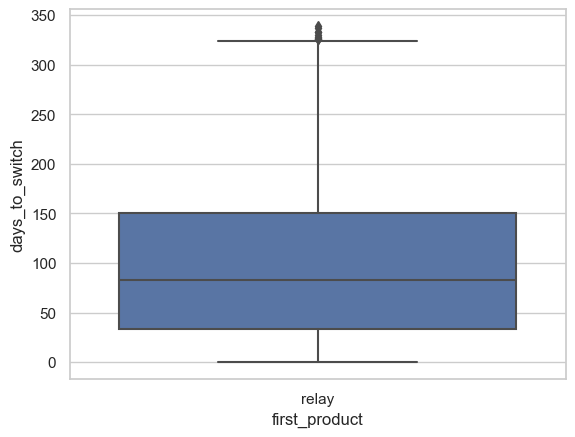

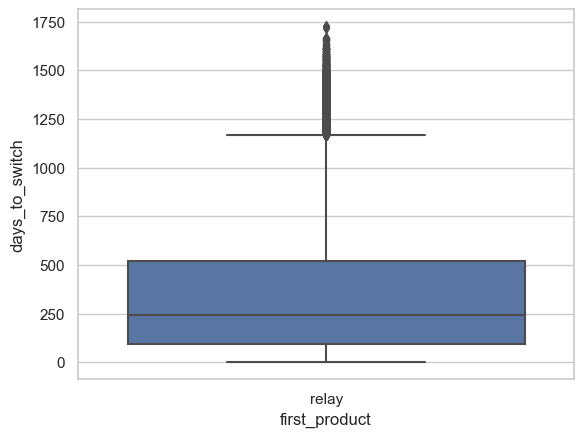

In [78]:
# keep only the columns 'days_with_invest', 'days_with_relay', 'days_with_money', 'days_with_loan', 'days_with_credit'
data = data[['days_with_invest', 'days_with_relay', 'days_with_money', 'days_with_loan', 'days_with_credit', 'num_products', 'first_product', 'second_product']]

#replace nan with 0 (no days with that product)
data = data.fillna(0)

just_second_product_money = data[(data.second_product == 'money') & (data.num_products == 2)]

first_relay_second_money = just_second_product_money[(just_second_product_money.first_product == 'relay')]
first_invest_second_money = just_second_product_money[(just_second_product_money.first_product == 'invest')]
first_loan_second_money = just_second_product_money[(just_second_product_money.first_product == 'loan')]
first_credit_second_money = just_second_product_money[(just_second_product_money.first_product == 'credit')]

print(first_relay_second_money.shape)
print(first_invest_second_money.shape)
print(first_loan_second_money.shape)
print(first_credit_second_money.shape)

#calculate the number of days it took to switch from the first product to the second product
first_relay_second_money['days_to_switch'] = first_relay_second_money['days_with_money'] - first_relay_second_money['days_with_relay']
first_invest_second_money['days_to_switch'] = first_invest_second_money['days_with_money'] - first_invest_second_money['days_with_invest']
first_loan_second_money['days_to_switch'] = first_loan_second_money['days_with_money'] - first_loan_second_money['days_with_loan']
first_credit_second_money['days_to_switch'] = first_credit_second_money['days_with_money'] - first_credit_second_money['days_with_credit']

print("all time")
print(first_relay_second_money['days_to_switch'].mean())
print(first_invest_second_money['days_to_switch'].mean())
print(first_loan_second_money['days_to_switch'].mean())
print(first_credit_second_money['days_to_switch'].mean())

print("past year")
print(first_relay_second_money[first_relay_second_money['days_with_money'] < 365]['days_to_switch'].mean())
print(first_invest_second_money[first_invest_second_money['days_with_money'] < 365]['days_to_switch'].mean())
print(first_loan_second_money[first_loan_second_money['days_with_money'] < 365]['days_to_switch'].mean())
print(first_credit_second_money[first_credit_second_money['days_with_money'] < 365]['days_to_switch'].mean())

#make a boxplot of the days to switch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x="first_product", y="days_to_switch", data=first_relay_second_money[first_relay_second_money['days_with_money'] < 365])
plt.show()

ax = sns.boxplot(x="first_product", y="days_to_switch", data=first_relay_second_money)
plt.show()



In [79]:
len(first_relay_second_money[first_relay_second_money['days_with_money'] < 365])

46660

(98577, 8)
(3854, 8)
(8095, 8)
(1906, 8)
329.13601550057314
337.52049818370523
77.04385423100679
262.51783840503674


/var/folders/kc/jdw9593x3ksdmnhyd571zm440000gp/T/ipykernel_28457/3809781112.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_relay_second_loan['days_to_switch'] = first_relay_second_loan['days_with_loan'] - first_relay_second_loan['days_with_relay']
/var/folders/kc/jdw9593x3ksdmnhyd571zm440000gp/T/ipykernel_28457/3809781112.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_invest_second_loan['days_to_switch'] = first_invest_second_loan['days_with_loan'] - first_invest_second_loan['days_wi

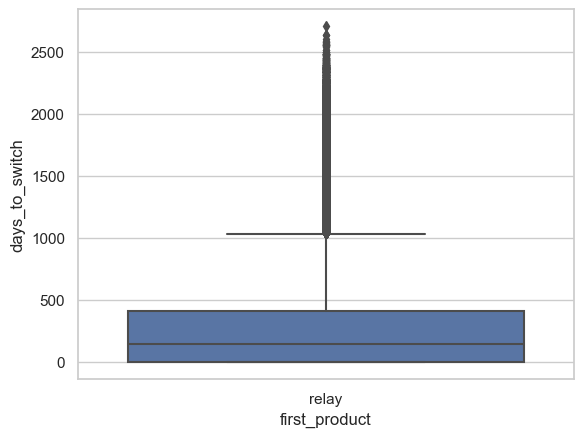

In [72]:
# keep only the columns 'days_with_invest', 'days_with_relay', 'days_with_money', 'days_with_loan', 'days_with_credit'
data = data[['days_with_invest', 'days_with_relay', 'days_with_money', 'days_with_loan', 'days_with_credit', 'num_products', 'first_product', 'second_product']]

#replace nan with 0 (no days with that product)
data = data.fillna(0)

#do the same as the previous cell but looking at the second product being loan
just_second_product_loan = data[(data.second_product == 'loan') & (data.num_products == 2)]

first_relay_second_loan = just_second_product_loan[(just_second_product_loan.first_product == 'relay')]
first_invest_second_loan = just_second_product_loan[(just_second_product_loan.first_product == 'invest')]
first_money_second_loan = just_second_product_loan[(just_second_product_loan.first_product == 'money')]
first_credit_second_loan = just_second_product_loan[(just_second_product_loan.first_product == 'credit')]
print(first_relay_second_loan.shape)
print(first_invest_second_loan.shape)
print(first_money_second_loan.shape)
print(first_credit_second_loan.shape)

#calculate the number of days it took to switch from the first product to the second product
first_relay_second_loan['days_to_switch'] = first_relay_second_loan['days_with_loan'] - first_relay_second_loan['days_with_relay']
first_invest_second_loan['days_to_switch'] = first_invest_second_loan['days_with_loan'] - first_invest_second_loan['days_with_invest']
first_money_second_loan['days_to_switch'] = first_money_second_loan['days_with_loan'] - first_money_second_loan['days_with_money']
first_credit_second_loan['days_to_switch'] = first_credit_second_loan['days_with_loan'] - first_credit_second_loan['days_with_credit']

print(first_relay_second_loan['days_to_switch'].mean())
print(first_invest_second_loan['days_to_switch'].mean())
print(first_money_second_loan['days_to_switch'].mean())
print(first_credit_second_loan['days_to_switch'].mean())

#make a boxplot of the days to switch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x="first_product", y="days_to_switch", data=first_relay_second_loan)
plt.show()


# notes
- difference between users that crossbuy and those that don't? credit score? etc.? 
- SQS?
- Michael knows about MQS data

# WHEN DO USERS CROSSBUY, WHAT DOES THAT PATH LOOK LIKE? 
- What more can we use to predict crossbuying - like interest rate hikes? Time of year? Seasonality? SoFi announcements? 

# IS THERE A DIFFERENCE BETWEEN USERS THAT CROSSBUY AND USERS THAT DONT?

